In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import os
import subprocess
import time

In [2]:
!g++ get_prob_win.cpp -o get_prob_win

In [11]:
cs = {1.5, 1.3, 1.2}
res = {}
mx = {}

for c in cs:
    res[c] = {}
    mx[c] = {}
    for n in range(1, 26):
        res[c][n] = {}
        max_prob = 0
        for k in range(1, 1001):
            out = subprocess.check_output(f"./get_prob_win {1/k} {k} {c/n} {n}", shell=True)
            res[c][n][k] = float(out.decode().split("\n")[-2].split(" ")[-1])
            if res[c][n][k] > max_prob:
                max_prob = res[c][n][k]
                mx[c][n] = k
    print(f"c = {c} end")

c = 1.2 end
c = 1.5 end
c = 1.3 end


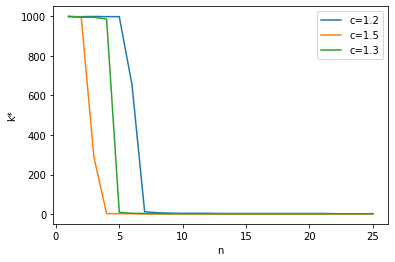

In [12]:
for c in cs:
    a = np.array([[n, k] for n, k in mx[c].items()]).T
    plt.plot(a[0,], a[1,], label=f"c={c}")
plt.xlabel("n")
plt.ylabel("k*")
plt.legend()
plt.show();

In [13]:
mx

{1.2: {1: 998,
  2: 998,
  3: 999,
  4: 998,
  5: 998,
  6: 656,
  7: 12,
  8: 7,
  9: 5,
  10: 4,
  11: 4,
  12: 4,
  13: 3,
  14: 3,
  15: 3,
  16: 3,
  17: 3,
  18: 3,
  19: 3,
  20: 3,
  21: 3,
  22: 2,
  23: 2,
  24: 2,
  25: 2},
 1.5: {1: 998,
  2: 995,
  3: 288,
  4: 3,
  5: 2,
  6: 2,
  7: 1,
  8: 1,
  9: 1,
  10: 1,
  11: 1,
  12: 1,
  13: 1,
  14: 1,
  15: 1,
  16: 1,
  17: 1,
  18: 1,
  19: 1,
  20: 1,
  21: 1,
  22: 1,
  23: 1,
  24: 1,
  25: 1},
 1.3: {1: 1000,
  2: 995,
  3: 995,
  4: 986,
  5: 9,
  6: 4,
  7: 3,
  8: 3,
  9: 2,
  10: 2,
  11: 2,
  12: 2,
  13: 2,
  14: 2,
  15: 2,
  16: 2,
  17: 2,
  18: 2,
  19: 2,
  20: 2,
  21: 2,
  22: 2,
  23: 2,
  24: 2,
  25: 2}}

ValueError: x and y must have same first dimension, but have shapes (998,) and (1,)

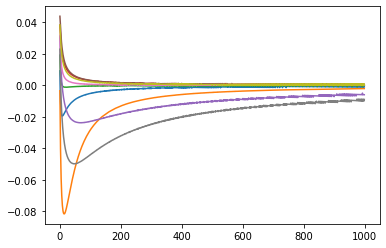

In [12]:
cs = {1.3, 1.1, 1.05}
ns = {5, 10, 100}
ks = np.arange(1, 1000)

for c in cs:
    for n in ns:
        res = np.zeros(len(ks))
        for k in ks:
            out = subprocess.check_output(f"./get_prob_win {1/k} {k} {c/n} {n}", shell=True)
            res[k-1] = float(out.decode().split("\n")[-2].split(" ")[-1])
        plt.plot(ks[:-1], ks[:-1]*(res[1:] - res[:-1]), label=f"c: {c}, n: {n}")
plt.plot(ks[:-1], 0, 'b-')
plt.legend()
plt.show();